Binary Logistic Regression - Email Spam Classification

In [ ]:
# @title Display instance of Dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Models/spam.csv', encoding="latin-1", usecols= ["Label", "Text"])
print(df.head())

  Label                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# @title Prep Data
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

In [ ]:
# @title Introduce Columns { vertical-output: true }
import nltk
nltk.download('punkt')
df['num_characters'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Label,Text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# @title Train Model { vertical-output: true }
x = df[['num_characters', 'num_words', 'num_sentences']]
y = df['Label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# @title Predict Labels { vertical-output: true }
y_pred = model.predict(x_test)
y_pred

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
# @title Accuracy of Model { vertical-output: true }
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8666666666666667


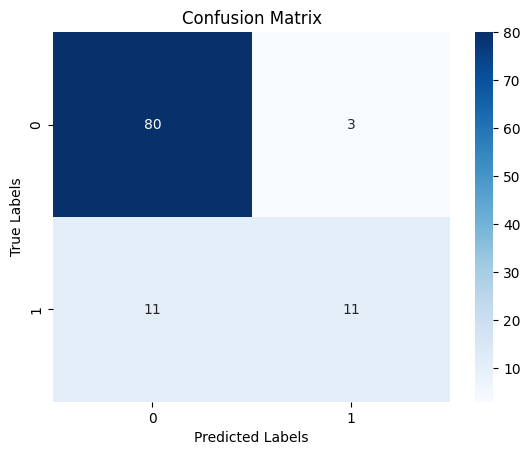

In [ ]:
# @title Confusion Matrix to Visualize Performance { vertical-output: true }
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()
